In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
info_df = pd.read_excel("1.xls", sheet_name="Инфо", header=None)
auction_dates = pd.to_datetime(info_df.iloc[1, 1:])
maturity_dates = pd.to_datetime(info_df.iloc[2, 1:])
avg_price_df = pd.read_excel("1.xls", sheet_name="Цены (средневзвешенные)", index_col=0)
last_price_df = pd.read_excel("1.xls", sheet_name="Цены (last)", index_col=0)
avg_price_df = avg_price_df.fillna(0)
last_price_df = last_price_df.fillna(0)

commission = 0.04
entry_date = datetime(1996, 6, 11)

In [ ]:
avg_price_df.head()

,21048,21049,21050,21051,21052,21053,21054,21055,21056,21057,...,25015,25016,25017,25018,25019,25020,25021,26001,26002,26003
Дата,,,,,,,,,,,,,,,,,,,,,
1996-01-03,96.91,93.68,91.70,88.01,86.14,84.15,81.10,80.23,77.26,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-01-04,97.56,94.29,92.27,88.44,86.91,84.87,81.58,80.47,78.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-01-05,98.78,96.06,94.21,90.67,89.11,87.22,84.27,83.08,81.23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-01-09,98.48,95.59,93.64,90.28,88.76,86.81,83.80,82.55,80.69,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-01-10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
last_price_df.head()

,21048,21049,21050,21051,21052,21053,21054,21055,21056,21057,...,25015,25016,25017,25018,25019,25020,25021,26001,26002,26003
Дата,,,,,,,,,,,,,,,,,,,,,
1996-01-03,97.25,94.00,92.00,88.65,86.35,84.80,81.80,80.85,77.26,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-01-04,97.80,94.90,93.10,89.40,87.80,86.08,82.99,82.39,79.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-01-05,99.00,96.48,94.46,91.06,89.59,87.55,84.46,83.35,81.40,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-01-09,98.35,95.41,93.40,90.21,88.36,86.75,83.75,82.60,80.79,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996-01-10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def calculate_nominal_yield(price_df, result_df, info_df, commission):
    for date in result_df.index:
        for bond, col_index in zip(result_df.columns, range(len(result_df.columns))):
            price = price_df.loc[date, bond]

            maturity_date = info_df.iloc[2, col_index + 1]

            if price == 0 or (maturity_date - entry_date).days == 0:
                nominal_yield = 0
            else:
                price_with_commission = price * (1 + commission)
                days_to_maturity = (maturity_date - entry_date).days
                nominal_yield = ((100 - price_with_commission) / (price_with_commission * days_to_maturity)) * 36500

            result_df.loc[date, bond] = nominal_yield

    return result_df

nominal_yields_avg_df = pd.DataFrame(index=avg_price_df.index, columns=avg_price_df.columns)
nominal_yields_last_df = pd.DataFrame(index=last_price_df.index, columns=last_price_df.columns)

nominal_yields_avg_df = calculate_nominal_yield(avg_price_df, nominal_yields_avg_df, info_df, commission)
nominal_yields_last_df = calculate_nominal_yield(last_price_df, nominal_yields_last_df, info_df, commission)

In [ ]:
nominal_yields_avg_df.head()

,21048,21049,21050,21051,21052,21053,21054,21055,21056,21057,...,25015,25016,25017,25018,25019,25020,25021,26001,26002,26003
Дата,,,,,,,,,,,,,,,,,,,,,
1996-01-03,1.95066,-7.302049,-14.182367,-30.427581,-40.799569,-53.676901,-81.62842,-95.321409,-129.362811,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-04,3.603305,-5.465921,-12.290919,-28.680857,-37.328667,-50.029261,-78.560683,-93.604741,-122.699196,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-05,6.646472,-0.270142,-6.024871,-19.888019,-27.742331,-38.542823,-62.015293,-75.576392,-97.186979,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-09,5.905143,-1.631049,-7.838991,-21.394439,-29.235642,-40.502054,-64.82954,-79.145077,-101.3775,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
nominal_yields_last_df.head()

,21048,21049,21050,21051,21052,21053,21054,21055,21056,21057,...,25015,25016,25017,25018,25019,25020,25021,26001,26002,26003
Дата,,,,,,,,,,,,,,,,,,,,,
1996-01-03,2.817876,-6.335863,-13.183946,-27.833964,-39.84682,-50.381174,-77.166669,-90.907526,-129.362811,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-04,4.20796,-3.653398,-9.578121,-24.841827,-33.392696,-44.036641,-69.754432,-80.231439,-110.893611,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-05,7.187257,0.934769,-5.236111,-18.394503,-25.713333,-36.979209,-60.886509,-73.775832,-95.879248,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-09,5.582496,-2.155798,-8.609455,-21.666201,-30.95677,-40.790325,-65.130787,-78.806452,-100.597252,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def calculate_effective_yield(price_df, result_df, info_df, commission):
    for date in result_df.index:
        for bond, col_index in zip(result_df.columns, range(len(result_df.columns))):
            price = price_df.loc[date, bond]

            maturity_date = info_df.iloc[2, col_index + 1]

            if price == 0 or (maturity_date - entry_date).days == 0:
                effective_yield = 0
            else:
                price_with_commission = price * (1 + commission)
                years_to_maturity = (maturity_date - entry_date).days / 365
                effective_yield = ((100 / price_with_commission) ** (1 / years_to_maturity) - 1) * 100

            result_df.loc[date, bond] = effective_yield

    return result_df

effective_yields_avg_df = pd.DataFrame(index=avg_price_df.index, columns=avg_price_df.columns)
effective_yields_last_df = pd.DataFrame(index=last_price_df.index, columns=last_price_df.columns)

effective_yields_avg_df = calculate_effective_yield(avg_price_df, effective_yields_avg_df, info_df, commission)
effective_yields_last_df = calculate_effective_yield(last_price_df, effective_yields_last_df, info_df, commission)

In [ ]:
effective_yields_avg_df.head()

,21048,21049,21050,21051,21052,21053,21054,21055,21056,21057,...,25015,25016,25017,25018,25019,25020,25021,26001,26002,26003
Дата,,,,,,,,,,,,,,,,,,,,,
1996-01-03,1.977611,-6.953702,-12.932553,-25.249204,-32.021046,-39.454527,-52.704847,-58.084977,-68.565937,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-04,3.696197,-5.268726,-11.342788,-24.041534,-29.864366,-37.482059,-51.461429,-57.479366,-66.82796,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-05,6.968499,-0.269646,-5.789219,-17.559876,-23.433015,-30.714943,-44.018321,-50.434882,-59.025183,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-09,6.158176,-1.613106,-7.443984,-18.720178,-24.483286,-31.93255,-45.378417,-51.935142,-60.445701,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
effective_yields_last_df.head()

,21048,21049,21050,21051,21052,21053,21054,21055,21056,21057,...,25015,25016,25017,25018,25019,25020,25021,26001,26002,26003
Дата,,,,,,,,,,,,,,,,,,,,,
1996-01-03,2.874414,-6.072188,-12.098192,-23.446836,-31.437633,-37.675868,-50.88316,-56.506333,-68.565937,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-04,4.335112,-3.564398,-8.993918,-21.296461,-27.311124,-34.061494,-47.66236,-52.380911,-63.459755,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-05,7.565087,0.94075,-5.057352,-16.388098,-21.975714,-29.723364,-43.461129,-49.656476,-58.569521,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-09,5.808184,-2.124545,-8.134968,-18.927227,-25.670934,-32.109409,-45.521591,-51.795164,-60.185701,0,...,0,0,0,0,0,0,0,0,0,0
1996-01-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
entry_date_str = entry_date.strftime("%Y-%m-%d")

try:
    row_index = nominal_yields_avg_df.index.get_loc(entry_date_str)
    print(f"Индекс даты {entry_date_str}: {row_index}")
except KeyError:
    print(f"Дата {entry_date_str} не найдена в индексе")

row_nominal_avg = nominal_yields_avg_df.iloc[row_index]
row_nominal_last = nominal_yields_last_df.iloc[row_index]
row_effective_avg = effective_yields_avg_df.iloc[row_index]
row_effective_last = effective_yields_last_df.iloc[row_index]

row_nominal_avg.head()

Индекс даты 1996-06-11: 109


,1996-06-11
21048,0
21049,0
21050,0
21051,0
21052,0


In [ ]:
def calculate_duration_months(auction_date, maturity_date):
    months = (maturity_date.year - auction_date.year) * 12 + maturity_date.month - auction_date.month
    return months

duration_months = [calculate_duration_months(a, m) for a, m in zip(auction_dates, maturity_dates)]

classification = pd.cut(duration_months,
                        bins=[0, 3, 12, float('inf')],
                        labels=['короткие', 'средние', 'длинные'])

result_df = pd.DataFrame({
    'Номер облигации': info_df.iloc[0, 1:],
    'Аукцион': auction_dates,
    'Погашение': maturity_dates,
    'Длительность': duration_months,
    'Класс бумаги': classification
})

result_df = result_df.dropna()

result_df

,Номер облигации,Аукцион,Погашение,Длительность,Класс бумаги
1,21048,1995-10-18,1996-01-17,3.0,короткие
2,21049,1995-10-25,1996-01-31,3.0,короткие
3,21050,1995-11-01,1996-02-07,3.0,короткие
4,21051,1995-11-15,1996-02-21,3.0,короткие
5,21052,1995-11-29,1996-02-28,3.0,короткие
...,...,...,...,...,...
170,25021,1998-01-21,2001-01-17,36.0,длинные
171,26001,1997-03-15,2003-03-15,72.0,длинные
172,26002,1997-03-15,2004-03-15,84.0,длинные
173,26003,1997-03-15,2005-03-15,96.0,длинные


In [ ]:
def plot_bonds(row, start, end, price_type, yield_type, duration):
    row.index = row.index.astype(int)
    plot_data = row[(row.index >= start) & (row.index <= end)]

    if plot_data.empty:
        print(f"Нет данных для диапазона {start}-{end}")
        return

    plt.figure(figsize=(10, 4))
    plt.bar(plot_data.index.astype(str), plot_data.values)

    title = f"{price_type}, {yield_type} доходность, {duration} бумаги"
    plt.title(title)
    plt.xlabel("Номер облигации", fontsize=9)
    plt.ylabel("Доходность, %", fontsize=9)
    plt.xticks(rotation=90, fontsize=7)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()

    max_bond = plot_data.idxmax()
    max_yield = plot_data.max()

    print(f"Бумага с максимальной доходностью: {max_bond}, доходность: {max_yield:.2f}%")

params = [
    (row_nominal_avg, "Средневзвешенные цены", "номинальная"),
    (row_effective_avg, "Средневзвешенные цены", "эффективная"),
    (row_nominal_last, "Последние цены", "номинальная"),
    (row_effective_last, "Последние цены", "эффективная")
]

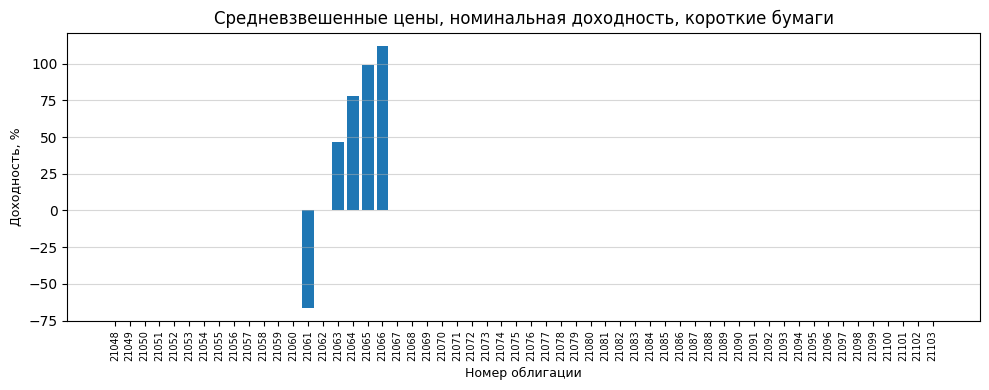

Бумага с максимальной доходностью: 21066, доходность: 112.34%


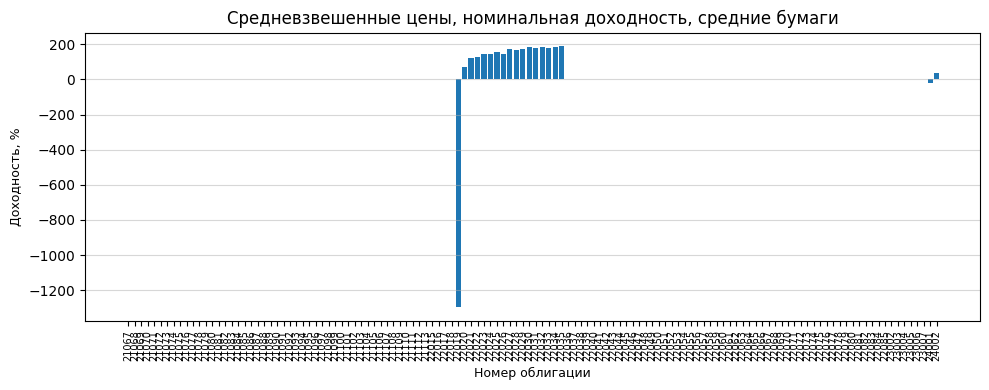

Бумага с максимальной доходностью: 22035, доходность: 191.72%


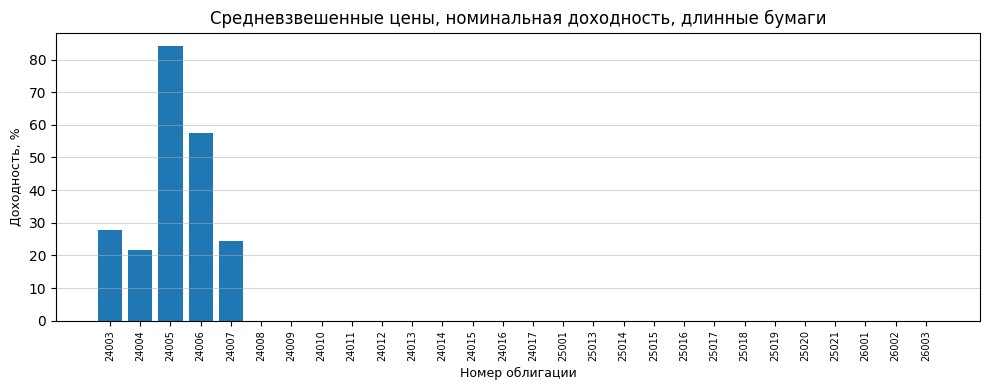

Бумага с максимальной доходностью: 24005, доходность: 84.07%


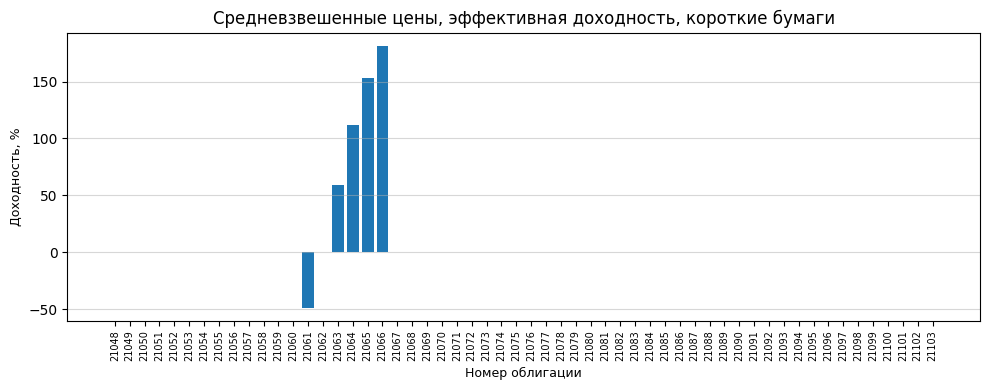

Бумага с максимальной доходностью: 21066, доходность: 181.53%


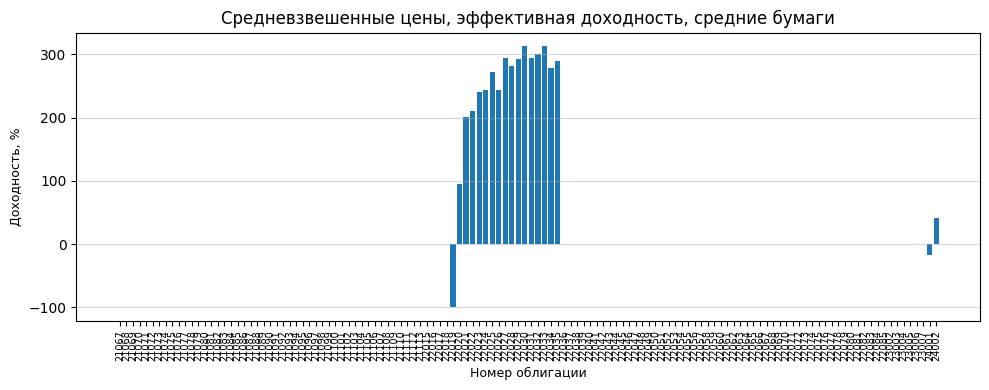

Бумага с максимальной доходностью: 22033, доходность: 313.53%


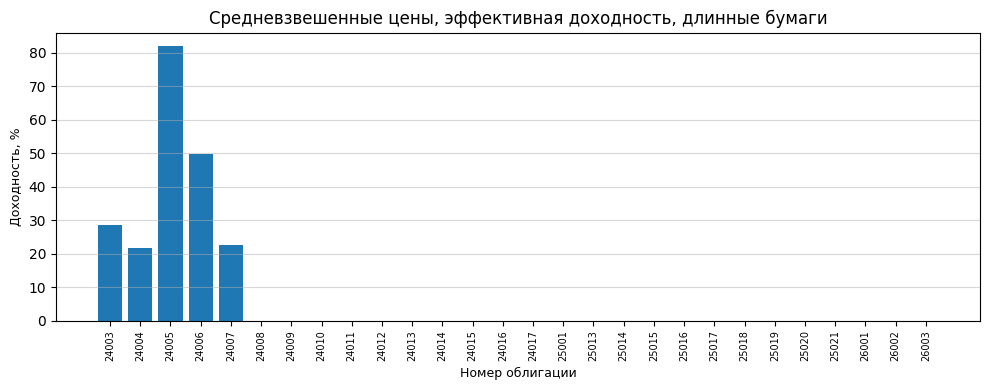

Бумага с максимальной доходностью: 24005, доходность: 81.97%


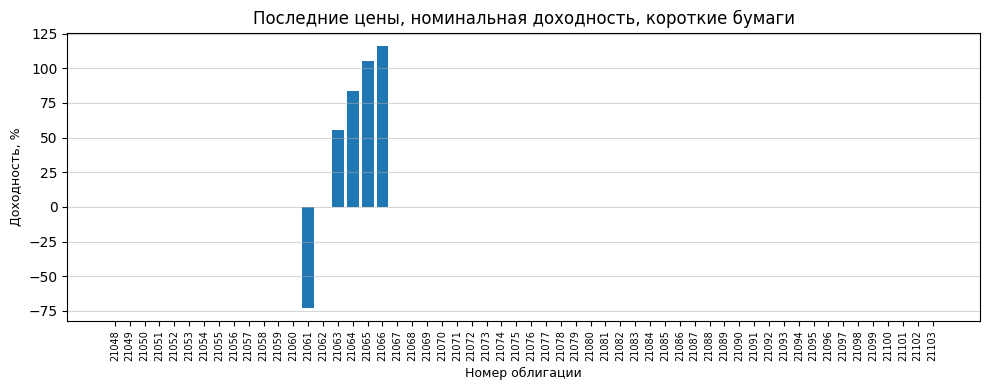

Бумага с максимальной доходностью: 21066, доходность: 116.34%


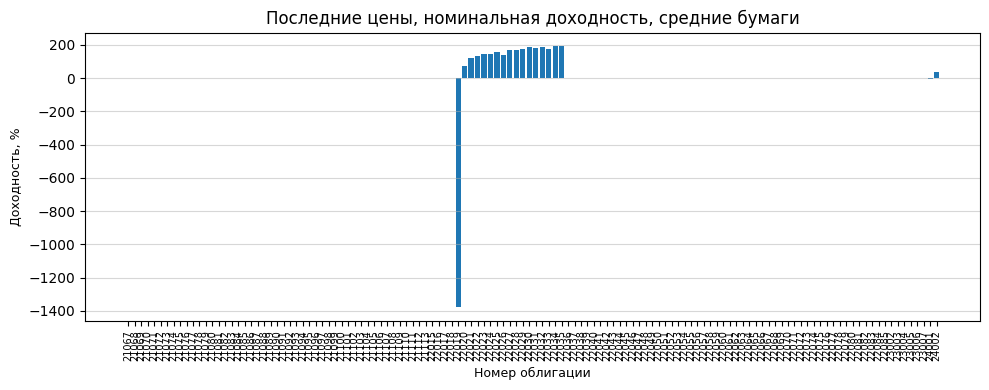

Бумага с максимальной доходностью: 22035, доходность: 195.46%


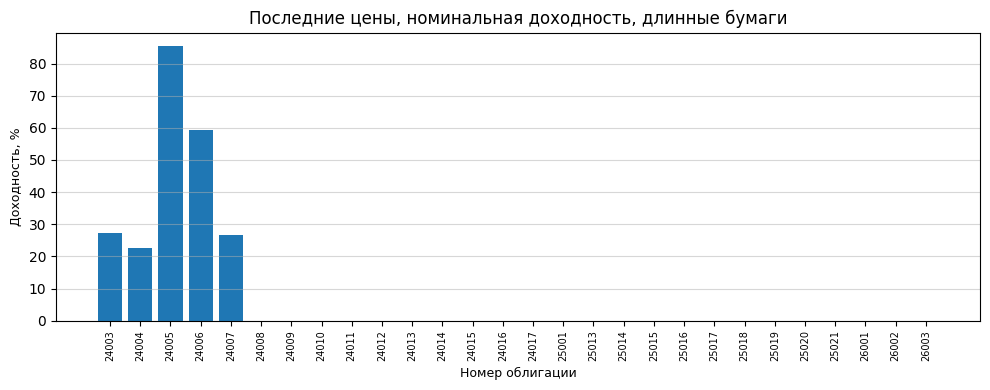

Бумага с максимальной доходностью: 24005, доходность: 85.37%


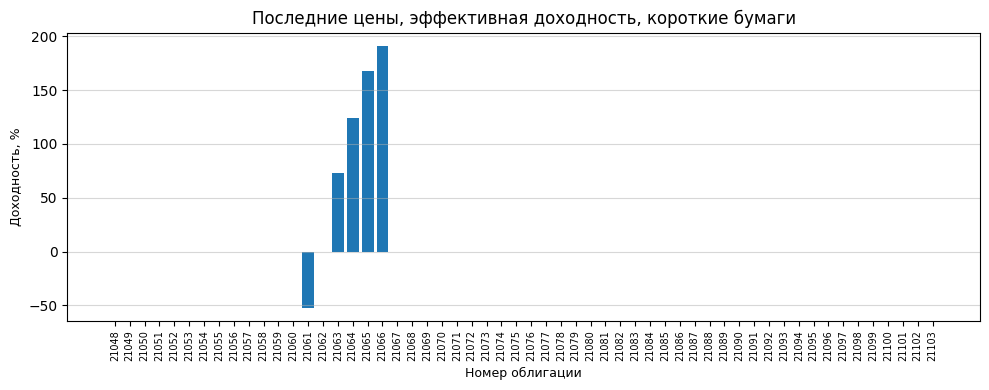

Бумага с максимальной доходностью: 21066, доходность: 191.25%


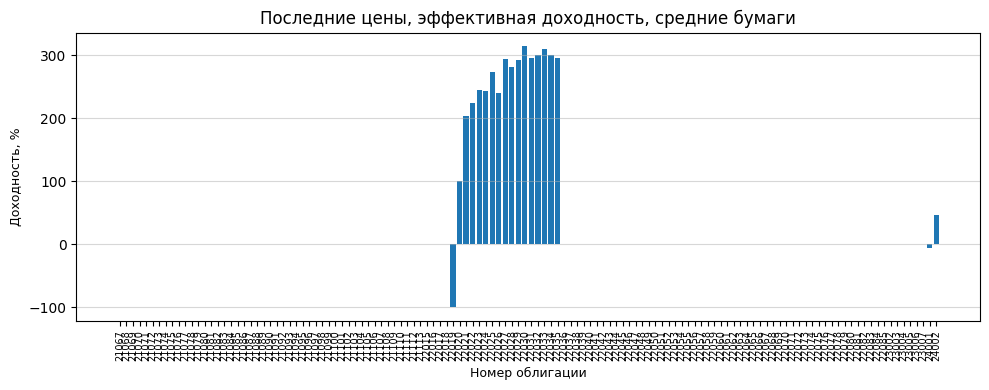

Бумага с максимальной доходностью: 22030, доходность: 315.50%


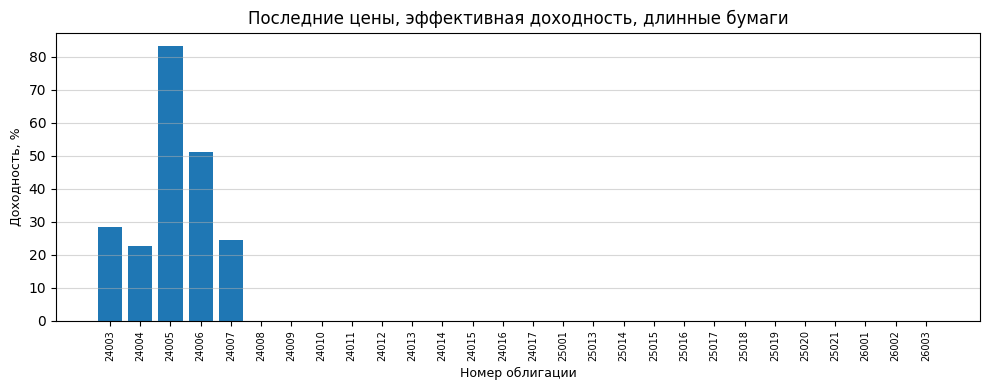

Бумага с максимальной доходностью: 24005, доходность: 83.21%


In [ ]:
short_bonds = result_df[result_df['Класс бумаги'] == 'короткие']['Номер облигации']
medium_bonds = result_df[result_df['Класс бумаги'] == 'средние']['Номер облигации']
long_bonds = result_df[result_df['Класс бумаги'] == 'длинные']['Номер облигации']

short_start = min(short_bonds)
short_end = max(short_bonds)
medium_start = min(medium_bonds)
medium_end = max(medium_bonds)
long_start = min(long_bonds)
long_end = max(long_bonds)

bond_groups = [
    (short_start, short_end, "короткие"),
    (medium_start, medium_end, "средние"),
    (long_start, long_end, "длинные")
]

for df, price_type, yield_type in params:
    for start, end, duration in bond_groups:
        plot_bonds(df, start, end, price_type, yield_type, duration)